In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer

In [2]:
df=pd.read_csv('bodyfat.csv')
print(df.describe())

          Density     BodyFat         Age      Weight      Height        Neck  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   19.150794   44.884921  178.924405   70.148810   37.992063   
std      0.019031    8.368740   12.602040   29.389160    3.662856    2.430913   
min      0.995000    0.000000   22.000000  118.500000   29.500000   31.100000   
25%      1.041400   12.475000   35.750000  159.000000   68.250000   36.400000   
50%      1.054900   19.200000   43.000000  176.500000   70.000000   38.000000   
75%      1.070400   25.300000   54.000000  197.000000   72.250000   39.425000   
max      1.108900   47.500000   81.000000  363.150000   77.750000   51.200000   

            Chest     Abdomen         Hip       Thigh        Knee       Ankle  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   100.824206   92.555952   99.904762   59.405952   38.590476   23.102381   
std      8.430476   10.7830

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depr

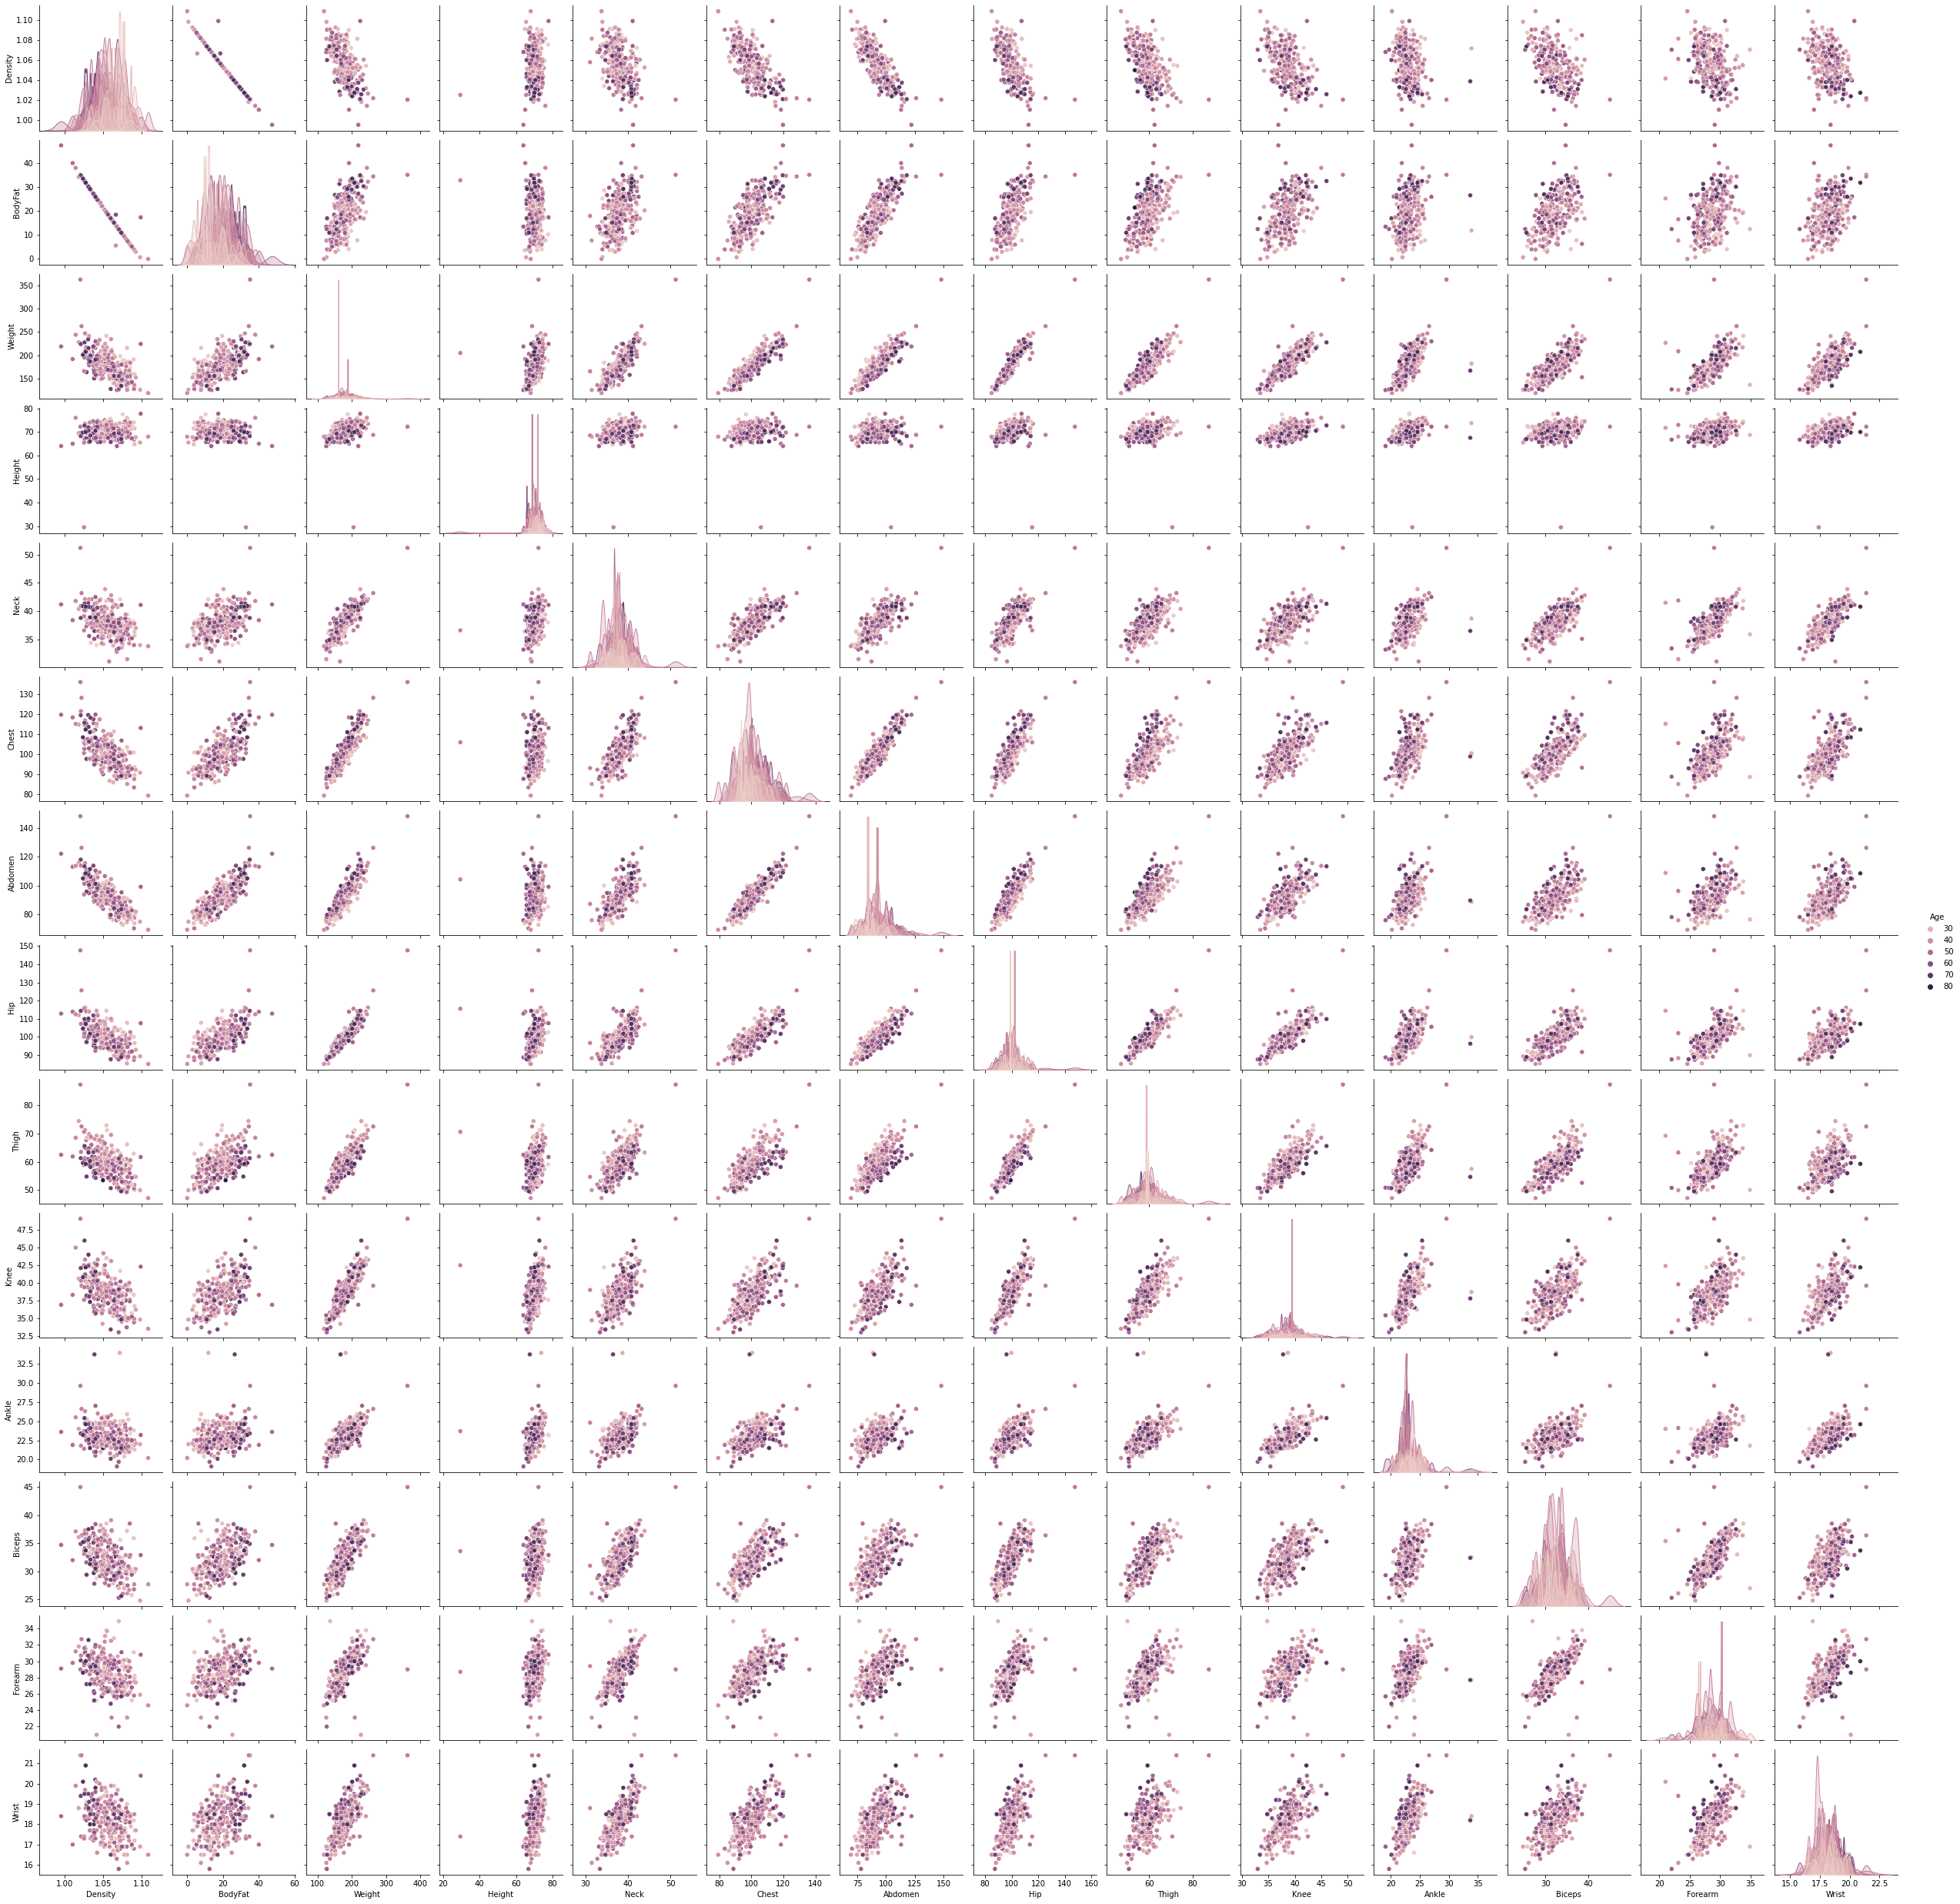

In [3]:
sns.pairplot(df,hue='Age',diag_kws={'bw': 0.2})

In [4]:
Segment=df.pop('Age')
scaler = StandardScaler()
df_t=pd.DataFrame(scaler.fit_transform(df))
df_t.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02
mean,5.677117e-15,-1.603655e-16,2.757935e-16,1.475396e-15,-7.586524e-16,-3.524518e-17,3.665498e-16,8.132824e-16,-8.426626e-16,8.564578e-16,7.361836e-16,-8.304644e-17,-2.977336e-15,2.854859e-16
std,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00,1.001990e+00
min,-3.189163e+00,-2.292926e+00,-2.060102e+00,-1.111966e+01,-2.840817e+00,-2.558224e+00,-2.151708e+00,-2.084632e+00,-2.329591e+00,-2.322577e+00,-2.366135e+00,-2.478519e+00,-3.800254e+00,-2.607794e+00
25%,-7.462399e-01,-7.992934e-01,-6.793000e-01,-5.194276e-01,-6.562274e-01,-7.694810e-01,-7.416097e-01,-6.160653e-01,-6.500498e-01,-6.711535e-01,-6.517075e-01,-6.876368e-01,-6.763048e-01,-6.759055e-01
50%,-3.547554e-02,5.891481e-03,-8.265733e-02,-4.070749e-02,3.271323e-03,-1.395583e-01,-1.492291e-01,-8.458411e-02,-7.747885e-02,-3.758855e-02,-1.787621e-01,-7.409368e-02,1.790624e-02,7.538454e-02
75%,7.805873e-01,7.362450e-01,6.162669e-01,5.747897e-01,5.906373e-01,5.408770e-01,6.289966e-01,5.063391e-01,5.618921e-01,5.544311e-01,5.306560e-01,6.803985e-01,6.625308e-01,6.120203e-01
max,2.807582e+00,3.394253e+00,6.280963e+00,2.079339e+00,5.444135e+00,4.204531e+00,5.161290e+00,6.684808e+00,5.323774e+00,4.366207e+00,6.383355e+00,4.220708e+00,3.092269e+00,3.402526e+00


          Density   BodyFat    Weight    Height      Neck     Chest   Abdomen  \
Density  1.000000 -0.987782 -0.594062  0.097881 -0.472966 -0.682599 -0.798955   
BodyFat -0.987782  1.000000  0.612414 -0.089495  0.490592  0.702620  0.813432   
Weight  -0.594062  0.612414  1.000000  0.308279  0.830716  0.894191  0.887995   
Height   0.097881 -0.089495  0.308279  1.000000  0.253710  0.134892  0.087813   
Neck    -0.472966  0.490592  0.830716  0.253710  1.000000  0.784835  0.754077   
Chest   -0.682599  0.702620  0.894191  0.134892  0.784835  1.000000  0.915828   
Abdomen -0.798955  0.813432  0.887995  0.087813  0.754077  0.915828  1.000000   
Hip     -0.609331  0.625201  0.940884  0.170394  0.734958  0.829420  0.874066   
Thigh   -0.553091  0.559608  0.868694  0.148436  0.695697  0.729859  0.766624   
Knee    -0.495040  0.508665  0.853167  0.286053  0.672405  0.719496  0.737179   
Ankle   -0.264890  0.265970  0.613685  0.264744  0.477892  0.482988  0.453223   
Biceps  -0.487109  0.493271 

<AxesSubplot:>

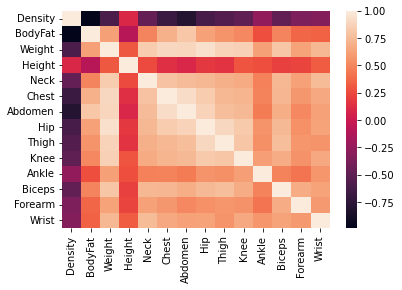

In [5]:
print(df.corr())
sns.heatmap(df.corr())

[0.6368272  0.12083632 0.05033063 0.04792445 0.03687997 0.03395195
 0.01987993 0.01711351 0.01337744 0.01151817 0.00559078 0.00323328
 0.0017185  0.00081787]


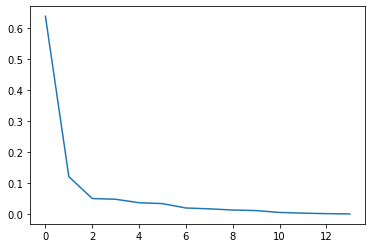

In [6]:
pca = PCA(n_components=14)
pc=pca.fit_transform(df_t)
v = pca.explained_variance_ratio_
print(v)
plt.plot(range(0,df_t.shape[1]),v)

In [7]:
percentage = 0.8
count_components = 0
sum = 0
for x in v:
    sum += x
    count_components += 1
    if sum >= percentage:
        break
print(count_components)

3


[0.6368272  0.12083632 0.05033063]


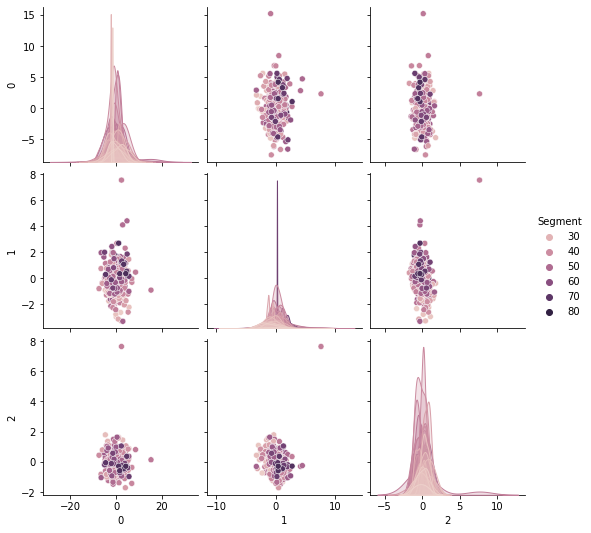

In [8]:
pca = PCA(n_components=3)
pc=pca.fit_transform(df_t)
pc=pd.DataFrame(pc)
pc['Segment']=Segment
sns.pairplot(pc,hue='Segment')
v = pca.explained_variance_ratio_
print(v)

In [9]:
fa=FactorAnalyzer(n_factors=3,rotation=None) 
scaler = StandardScaler()
aps_reduced=scaler.fit_transform(df_t)
fa.fit(aps_reduced)
loads=fa.loadings_
print(loads)
print(fa.get_communalities())
print(fa.get_uniquenesses())

[[-0.70836222  0.65782649 -0.07673689]
 [ 0.72484197 -0.65812271  0.09174202]
 [ 0.97722117  0.13474005 -0.07511259]
 [ 0.21444141  0.40768472  0.07028673]
 [ 0.83729176  0.17805491  0.21315771]
 [ 0.90727787 -0.09057716  0.09808798]
 [ 0.92340125 -0.24298632  0.00878259]
 [ 0.93040118  0.018828   -0.27839336]
 [ 0.87086035  0.06102754 -0.29880286]
 [ 0.84682304  0.17329697 -0.15859628]
 [ 0.58828501  0.26819593 -0.05843709]
 [ 0.81507245  0.14596538  0.05297138]
 [ 0.65532103  0.20980109  0.1734864 ]
 [ 0.74042807  0.33728691  0.26058449]]
[0.94040128 0.96693799 0.97875801 0.21713217 0.77819725 0.84097861
 0.91178936 0.94350372 0.85140526 0.77229388 0.4214232  0.68845496
 0.50355968 0.72990046]
[0.05959872 0.03306201 0.02124199 0.78286783 0.22180275 0.15902139
 0.08821064 0.05649628 0.14859474 0.22770612 0.5785768  0.31154504
 0.49644032 0.27009954]


In [10]:
fa=FactorAnalyzer(n_factors=3,rotation='varimax') 
fa.fit(df_t)
loads=fa.loadings_
print(loads)
print(fa.get_communalities())
print(fa.get_uniquenesses())

[[-0.07461576 -0.93486867 -0.24668672]
 [ 0.09242866  0.94803271  0.24419032]
 [ 0.61953216  0.41917752  0.64747827]
 [ 0.40656568 -0.18579077  0.13159906]
 [ 0.71926375  0.37883741  0.342548  ]
 [ 0.53945298  0.60185262  0.43329265]
 [ 0.41030499  0.70924245  0.49032063]
 [ 0.41230082  0.43413981  0.7648754 ]
 [ 0.39067862  0.36244494  0.75326565]
 [ 0.51920528  0.29513504  0.64468215]
 [ 0.47620164  0.10089393  0.42950624]
 [ 0.59967212  0.35188662  0.45279588]
 [ 0.60816897  0.2423806   0.27375505]
 [ 0.78157985  0.21059437  0.27328266]]
[0.94040129 0.96693799 0.97875801 0.21713217 0.77819725 0.84097861
 0.91178936 0.94350372 0.85140526 0.77229389 0.4214232  0.68845496
 0.50355968 0.72990047]
[0.05959871 0.03306201 0.02124199 0.78286783 0.22180275 0.15902139
 0.08821064 0.05649628 0.14859474 0.22770611 0.5785768  0.31154504
 0.49644032 0.27009953]
